In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

ds = pd.read_csv('/content/drive/MyDrive/Datasets/auto-mpg.data.txt', delim_whitespace=True, header=None)
ds.columns = header # assign header as column labels
ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [33]:
mpg = ds['mpg']
print(mpg)
print(type(mpg))

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64
<class 'pandas.core.series.Series'>


In [34]:
print(ds['horsepower'].head(5))

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: object


In [35]:
print(ds['origin'].nunique())

3


In [36]:
print(ds['weight'].isnull().any())

False


In [102]:
horsepower_series = ds['horsepower'].replace('?', np.nan)
horsepower_series = pd.Series(map(float, horsepower_series)) # had  to map the values from string to float
horsepower_series.fillna(horsepower_series.mean(skipna=True), inplace=True)

ds['horsepower'] = horsepower_series

print(horsepower_series.isna().any())

False


In [38]:
print(ds['weight'].sort_values(ascending=False))

44     5140.0
103    4997.0
42     4955.0
90     4952.0
95     4951.0
        ...  
53     1773.0
345    1760.0
343    1755.0
144    1649.0
54     1613.0
Name: weight, Length: 398, dtype: float64


In [40]:
print(ds[ds['mpg'] > 30])

      mpg  cylinders  displacement horsepower  weight  acceleration  \
53   31.0          4          71.0      65.00  1773.0          19.0   
54   35.0          4          72.0      69.00  1613.0          18.0   
129  31.0          4          79.0      67.00  1950.0          19.0   
131  32.0          4          71.0      65.00  1836.0          21.0   
144  31.0          4          76.0      52.00  1649.0          16.5   
..    ...        ...           ...        ...     ...           ...   
390  32.0          4         144.0      96.00  2665.0          13.9   
391  36.0          4         135.0      84.00  2370.0          13.0   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model_year  origin             car_name  
53           71       3  toyota corolla 1200  
54           71       3          datsun 1200  
129   

In [45]:
print(ds.groupby('cylinders')['acceleration'].mean())

cylinders
3    13.250000
4    16.601471
5    18.633333
6    16.263095
8    12.955340
Name: acceleration, dtype: float64


In [53]:
q1 = ds['displacement'].quantile(0.25)
q3 = ds['displacement'].quantile(0.75)
print(q3 - q1) #IQR

157.75


In [88]:
print(ds[(ds['cylinders'] == 4) & (ds['mpg'] >= 35)]['car_name'].unique())

['datsun 1200' 'renault 5 gtl' 'volkswagen rabbit custom diesel'
 'ford fiesta' 'datsun b210 gx' 'honda civic cvcc'
 'dodge colt hatchback custom' 'fiat strada custom' 'vw rabbit'
 'toyota corolla tercel' 'datsun 310' 'datsun 510 hatchback' 'mazda glc'
 'datsun 210' 'vw rabbit c (diesel)' 'vw dasher (diesel)'
 'honda civic 1500 gl' 'renault lecar deluxe' 'triumph tr7 coupe'
 'toyota starlet' 'plymouth champ' 'honda civic 1300' 'datsun 210 mpg'
 'toyota tercel' 'volkswagen rabbit l' 'mazda glc custom l'
 'plymouth horizon miser' 'mercury lynx l' 'nissan stanza xe'
 'honda accord' 'honda civic' 'datsun 310 gx' 'dodge charger 2.2'
 'vw pickup']


In [93]:
print(ds[ds['mpg'] == ds['mpg'].max()]['car_name'])

322    mazda glc
Name: car_name, dtype: object


In [109]:
print(ds[['mpg', 'cylinders', 'horsepower', 'weight']].corr())

                 mpg  cylinders  horsepower    weight
mpg         1.000000  -0.775396   -0.771437 -0.831741
cylinders  -0.775396   1.000000    0.838939  0.896017
horsepower -0.771437   0.838939    1.000000  0.860574
weight     -0.831741   0.896017    0.860574  1.000000


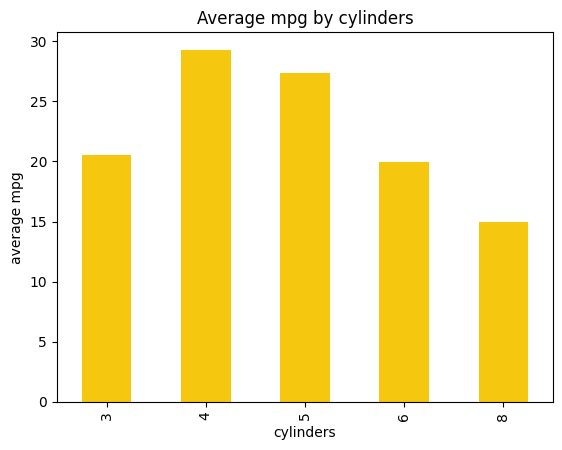

In [121]:
mpg_cylinder = ds.groupby('cylinders')['mpg'].mean()
mpg_cylinder.plot(kind='bar', color='#f5c70f')
plt.ylabel('average mpg')
plt.title('Average mpg by cylinders')
plt.show()

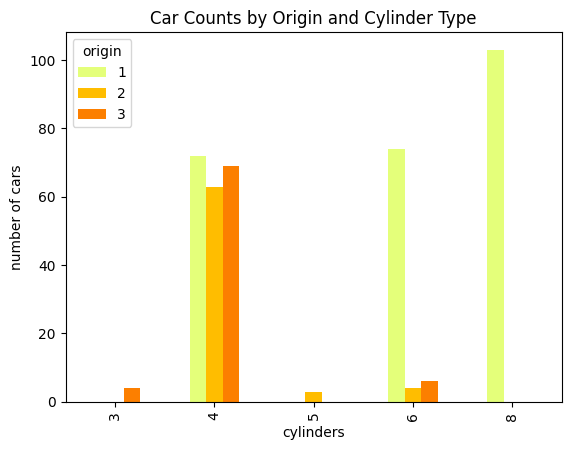

In [129]:
car_counts_by_origin = ds.pivot_table(index='cylinders', columns='origin', aggfunc='size')
car_counts_by_origin.plot(kind='bar', cmap='Wistia')
plt.title('Car Counts by Origin and Cylinder Type')
plt.ylabel('number of cars')
plt.show()